## First-order systems     
(C) 2019 by Wawrzyniec L. Dobrucki, Ph.D. 

**First-order system** is another example of a linear system defined by the ordinary differential equation (ODE) shown below:   

$a_0 y(t) + a_1 \dfrac{\delta y}{\delta t} + ... + a_n \dfrac{\delta^n y}{\delta t^{n}} = b_0 x(t) + b_1 \dfrac{\delta x}{\delta t} + ... + b_m \dfrac{\delta^m x}{\delta t^m}$

In first-order system, the coefficients $n =1, m = 0$ which simplifies the ODE to the following form:   

$a_1 \dfrac{\delta y}{\delta t} + a_0 y(t) = b_0 x(t)$   
   
This ODE can be solved to get the following equation containing terms $y(t)$ and $x(t)$:   

$y(t) = \dfrac{b_0}{a_0} x(t) - \dfrac{b_0}{a_0} e^{-\frac{a_0}{a_1}t} x(t)$   

if we will define sensitivity $K = \dfrac{b_0}{a_0}$ and coefficient $\tau = \dfrac{a_1}{a_0}$, we can use the following equation for further considerations:   

$y(t) = K (1 - e^{-t/\tau}) x(t)$

Let's define the first-order system and plot it's responses to step and sinusoidal input functions.

In [18]:
# standard imports
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [19]:
# definition of the system with K and tau coefficients
def first_order(x, K, t, tau):
    output = K * (1 - np.e**(-t/tau)) * x
    return output

### System's response to step input function
First, let's evaluate first-order system's response to step input function modeled after piecewise function.    
Let's define and plot both input x(t) and the output y(t).

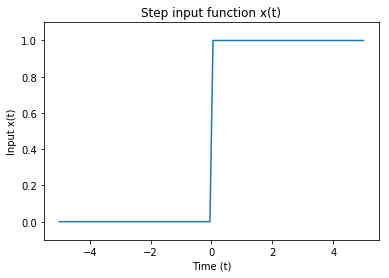

In [20]:
# definition of the piecewise input function (step input function)
t = np.linspace (-5, 5, 100)
x = np.piecewise(t, [t<0, t>=0], [0, 1])
plt.plot(t, x)
plt.grid(False)
plt.title('Step input function x(t)')
plt.xlabel('Time (t)')
plt.ylabel('Input x(t)')
plt.ylim(-0.1, 1.1)
plt.show()

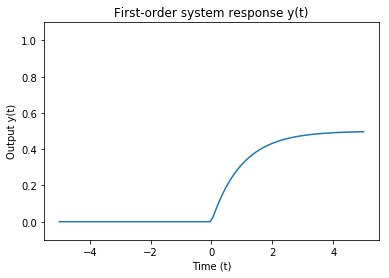

In [21]:
# Plotting system's response to step input function
y = first_order(x, 0.5, t, 1)
plt.plot(t, y) 
    
plt.grid(False)
plt.title('First-order system response y(t)')
plt.xlabel('Time (t)')
plt.ylabel('Output y(t)')
plt.ylim(-0.1, 1.1)
plt.show()

### System's response to sinusoidal inputs
Next, let's evaluate first-order system's response to sinusoidal input at frequency $f$.    
Let's define and plot a sinusoidal input and the output y(t).

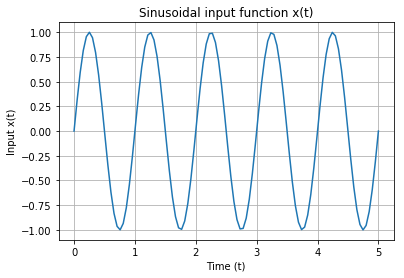

In [22]:
# definition of the sinusoidal input function x(t) with frequency 1 Hz
t = np.linspace (0, 5, 100)
f = 1
x = np.sin(2*np.pi*f*t)
plt.plot(t, x)
plt.grid(True)
plt.title('Sinusoidal input function x(t)')
plt.xlabel('Time (t)')
plt.ylabel('Input x(t)')
plt.ylim(-1.1, 1.1)
plt.show()

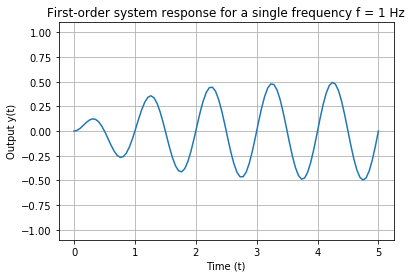

In [23]:
# Plotting system's response to sinusoidal input function
y = first_order(x, 0.5, t, 1)
plt.plot(t, y) 
    
plt.grid(True)
plt.title('First-order system response for a single frequency f = 1 Hz')
plt.xlabel('Time (t)')
plt.ylabel('Output y(t)')
plt.ylim(-1.1, 1.1)
plt.show()

### First-order system: Bode plots of magnitude and phase
Previously, we have plotted the first-order system response for a single frequency of the sinusoidal input signal. A Bode plot is a useful tool that shows the gain (magnitude) and phase response of a given LTI system for different frequencies. Typically, the frequency of the bode plots are plotted against a logarithmic frequency axis.   
Let's define a first-order system and graph Bode plots for the gain (magnitude) and phase.

In [24]:
# definition of a representative first-order system (S + 1)
system1 = signal.lti([1], [1, 1])
w, mag, phase = signal.bode(system1)

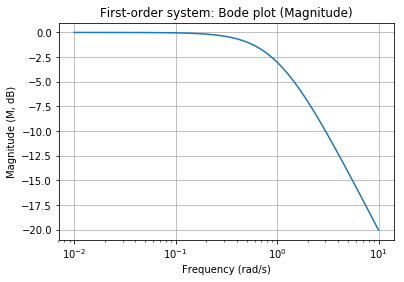

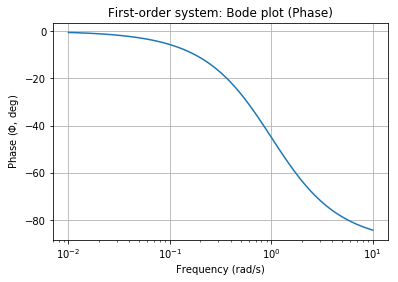

In [25]:
plt.figure()
plt.semilogx(w, mag)
plt.title('First-order system: Bode plot (Magnitude)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (M, dB)')
plt.grid(True)
plt.figure()
plt.semilogx(w, phase)
plt.title('First-order system: Bode plot (Phase)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase ($\Phi$, deg)')
plt.grid(True)
plt.show()